In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('credit_score_cleaned_train.csv', low_memory=False)
raw.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'credit_history_age',
       'total_emi_per_month', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'type_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'payment_of_min_amount',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [3]:
raw = raw.dropna()
raw = raw.drop(['id', 'customer_id', 'name', 'ssn', 'type_of_loan'], axis='columns')
raw.dtypes

month                        object
age                           int64
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
credit_history_age            int64
total_emi_per_month         float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                   int64
delay_from_due_date           int64
num_of_delayed_payment        int64
changed_credit_limit        float64
num_credit_inquiries          int64
credit_mix                   object
outstanding_debt            float64
credit_utilization_ratio    float64
payment_of_min_amount        object
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
credit_score                  int64
dtype: object

In [4]:
from itertools import chain

categorical = ['month', 'occupation', 'payment_behaviour']
ordinal = ['credit_mix', 'payment_of_min_amount']

for f in chain(categorical, ordinal):
    print(f'{f}: {*np.unique(raw[f]),}\n')

month: ('April', 'August', 'February', 'January', 'July', 'June', 'March', 'May')

occupation: ('Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer', 'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic', 'Media_Manager', 'Musician', 'Scientist', 'Teacher', 'Writer')

payment_behaviour: ('High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments')

credit_mix: ('Bad', 'Good', 'Standard')

payment_of_min_amount: ('No', 'Yes')



In [5]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

# Ignore categorical features
clean = raw.drop(categorical, axis='columns')

ordinal_encode = OrdinalEncoder(
    categories=[
        ['Bad', 'Standard', 'Good'],    # credit_mix
        ['No', 'Yes'],                  # payment_of_min_amount
    ]
)
clean[ordinal] = ordinal_encode.fit_transform(raw[ordinal])

In [6]:
from sklearn.model_selection import train_test_split

def normalize(df : pd.DataFrame):
    scaler = MinMaxScaler()
    features = df[df.columns.drop(['credit_score', 'monthly_inhand_salary'])]
    target = df['credit_score']

    X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2)

    # Normalize based only on the training data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print(f'{X_train.shape}  {X_test.shape}')
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = normalize(clean)

(77356, 18)  (19340, 18)


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

cnb = GaussianNB()
cnb.fit(X_train, Y_train)
Y_pred = cnb.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred) * 100
print(f'Accuracy of model {accuracy}%')

Accuracy of model 63.92450879007239%


              precision    recall  f1-score   support

           0       0.63      0.71      0.67      5446
           1       0.84      0.53      0.65     10347
           2       0.45      0.86      0.59      3547

    accuracy                           0.64     19340
   macro avg       0.64      0.70      0.64     19340
weighted avg       0.71      0.64      0.64     19340



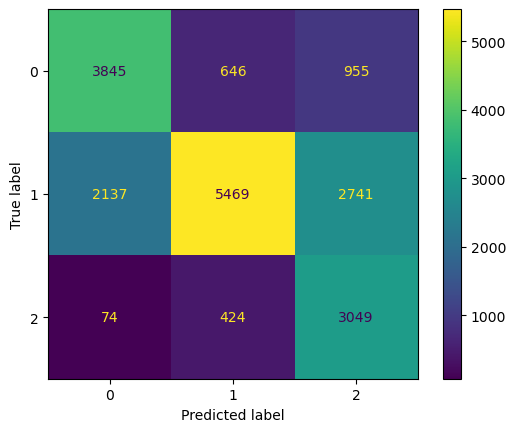

In [8]:
# compute and print accuracy score
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred)
print(classification_report(Y_test,Y_pred))

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=4, max_depth=3, max_leaf_nodes=5)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred) * 100
print(f'Accuracy of model {accuracy}%')

Accuracy of model 66.25129265770424%


              precision    recall  f1-score   support

           0       0.59      0.82      0.68      5446
           1       0.86      0.55      0.67     10347
           2       0.52      0.75      0.61      3547

    accuracy                           0.66     19340
   macro avg       0.66      0.71      0.66     19340
weighted avg       0.72      0.66      0.66     19340



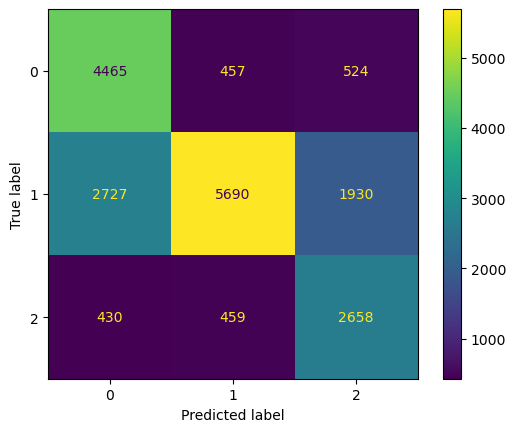

In [10]:
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred)
print(classification_report(Y_test,Y_pred))

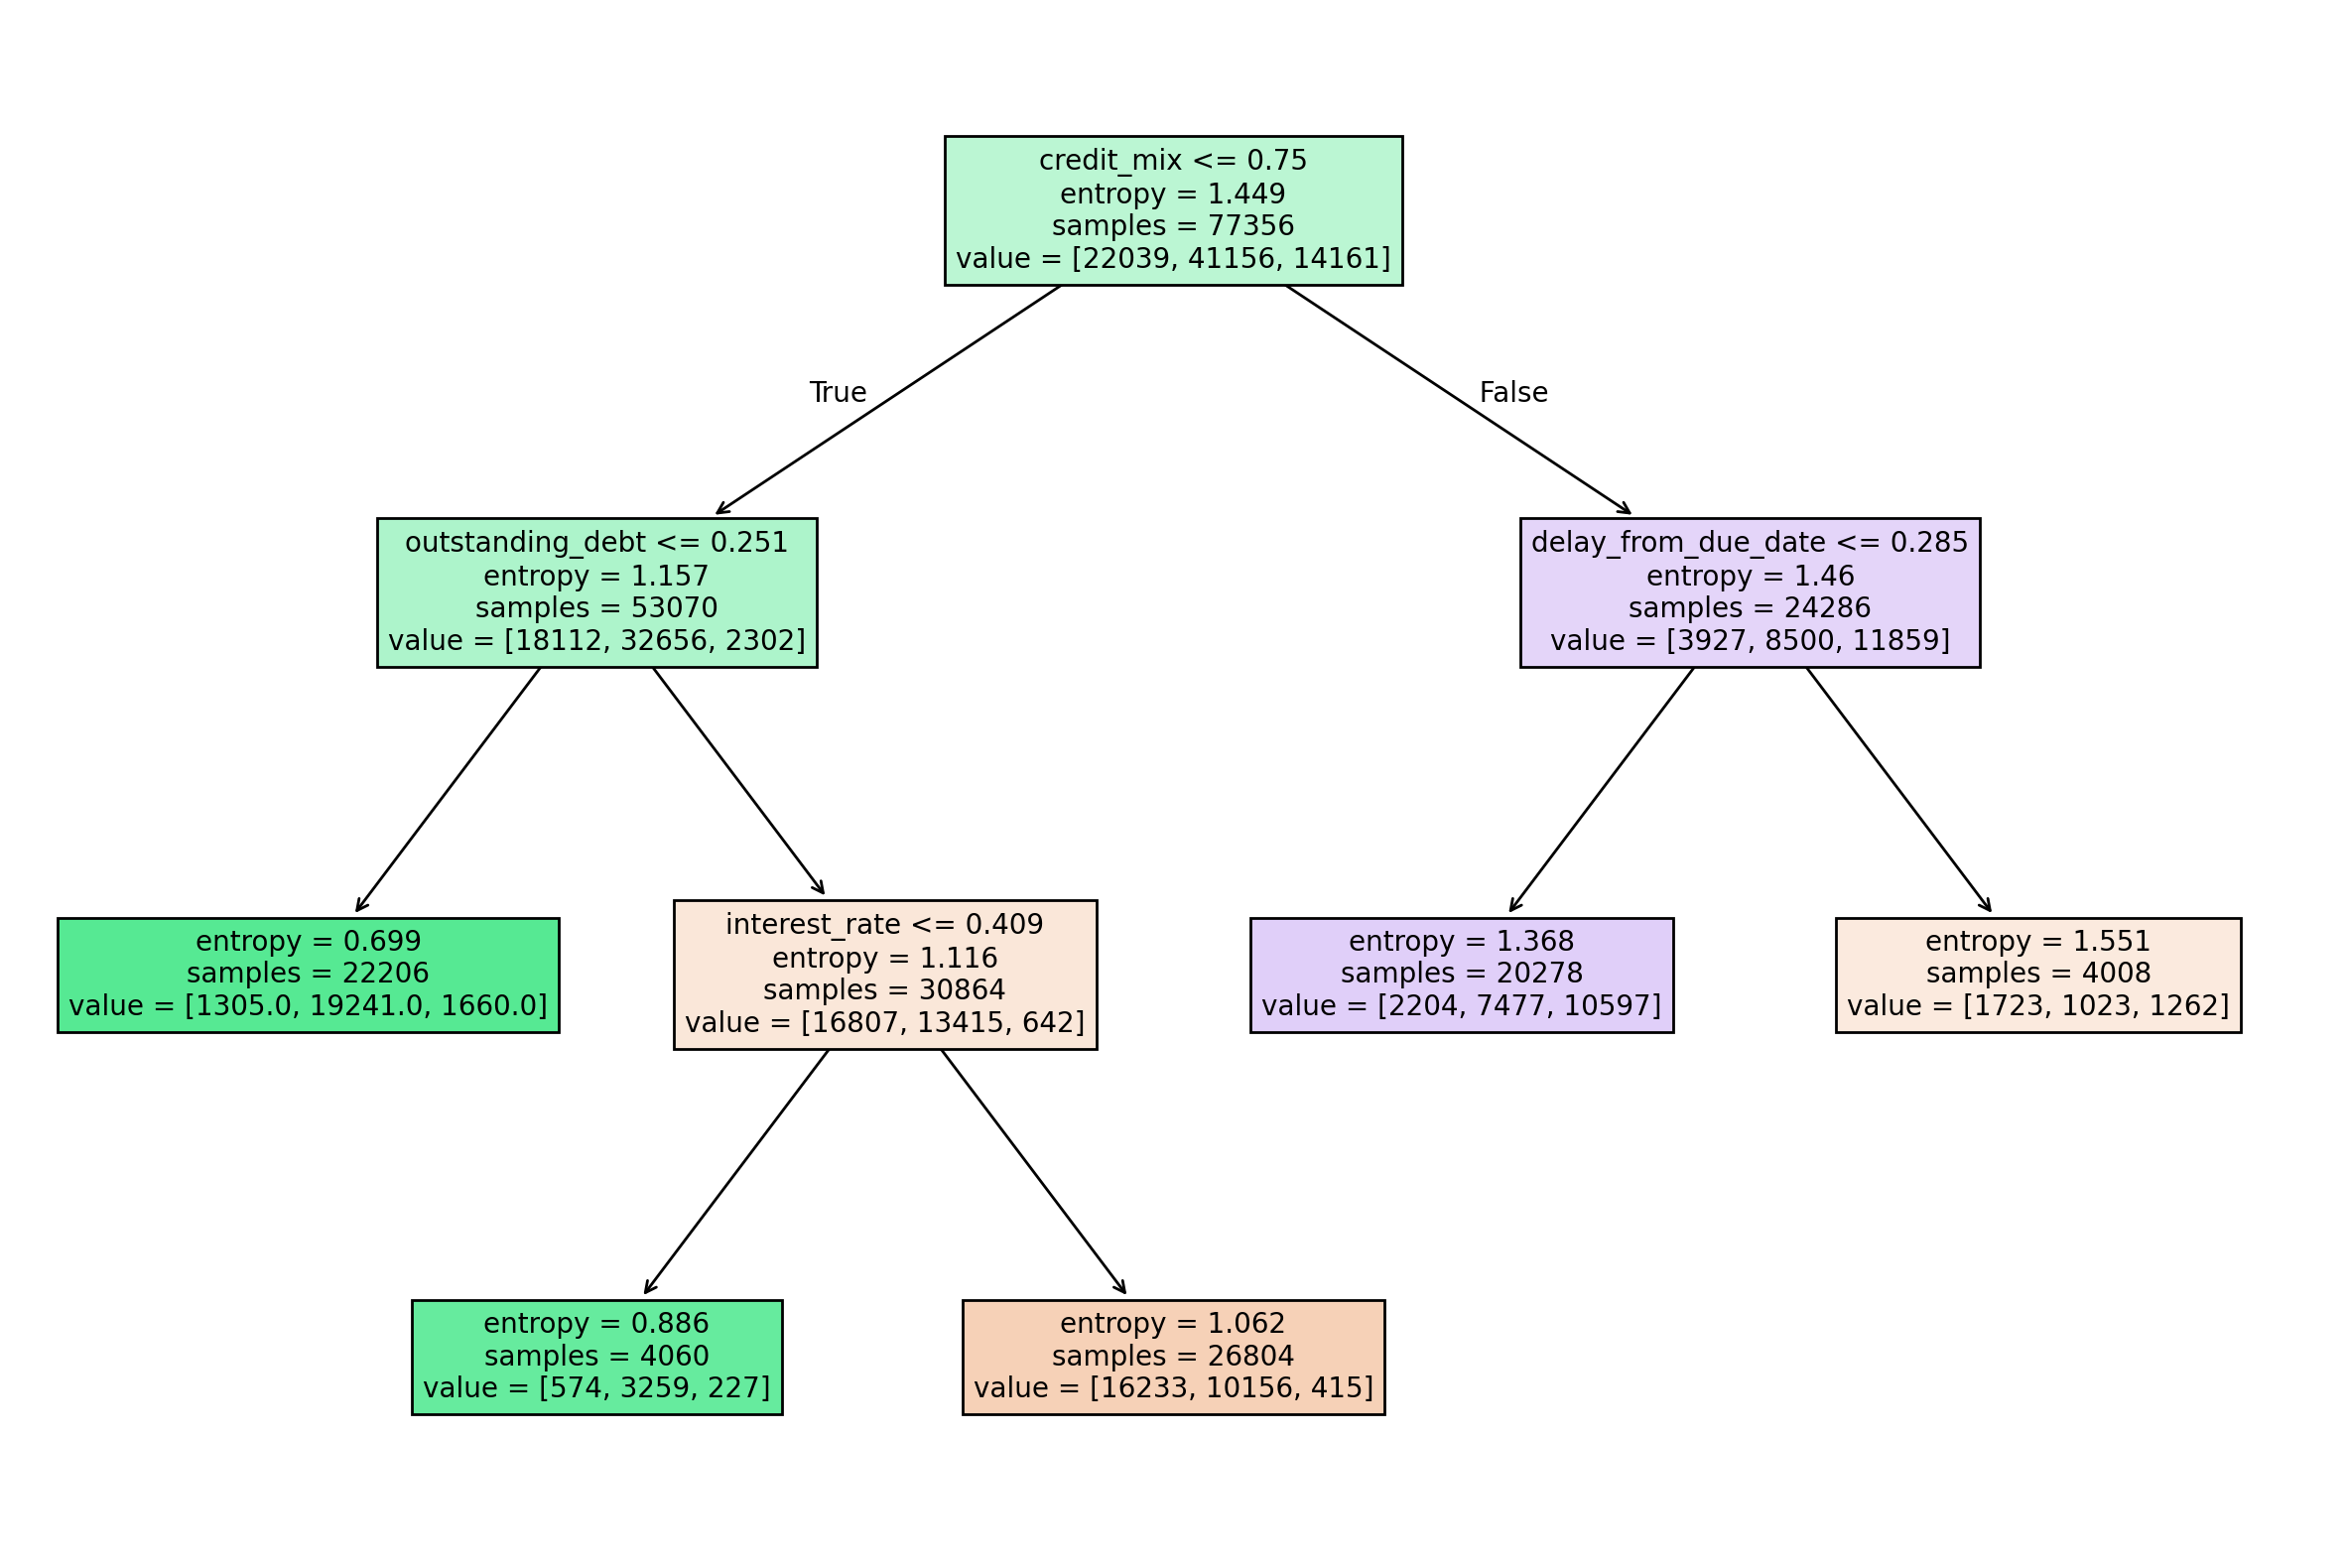

In [11]:
from sklearn.tree import plot_tree

feature_names = clean.columns.drop(['credit_score', 'monthly_inhand_salary'])

plt.figure(figsize=(15,10), dpi=200)
plot_tree(model,fontsize=10,filled=True,feature_names=feature_names);
plt.show()